### 📌Import Libraries  
We begin by importing the Python libraries needed for data handling, preprocessing, visualization, and modeling.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


### 📌Load Dataset  
We load the **Framingham Heart Study dataset** and preview its structure.


In [2]:
disease_df = pd.read_csv("data/framingham.csv")
disease_df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 📌Data Cleaning  
- Remove `education` column  
- Rename *male* → *Sex_male* for clarity  
- Drop all rows with missing values  


In [3]:
disease_df.drop(columns=['education'], inplace=True)
disease_df.rename(columns={'male':'Sex_male'}, inplace=True)
disease_df.dropna(axis=0, inplace=True)

disease_df.head()


,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 📌Examine Heart Disease Occurrence (Target Variable)  
This helps us understand class balance before training the model.


In [4]:
print(disease_df.TenYearCHD.value_counts())


TenYearCHD
0    3179
1     572
Name: count, dtype: int64


### 📌Select Features (X) & Target (y)  
We select relevant cardiovascular risk indicators.  
Then we standardize features for better model performance.


In [5]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay','totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

X = preprocessing.StandardScaler().fit(X).transform(X)


### 📌Split Data  
Data is split 70% training and 30% testing.


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


### 📌Visualization  
We plot the count of positive vs negative cases of heart disease.


C:\Users\sammi\AppData\Local\Temp\ipykernel_15792\565222555.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


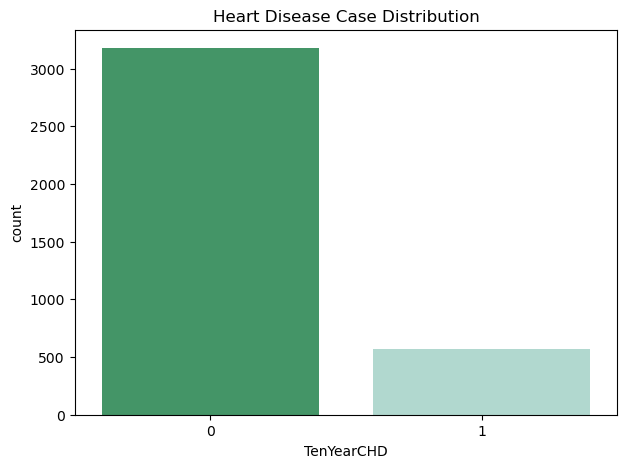

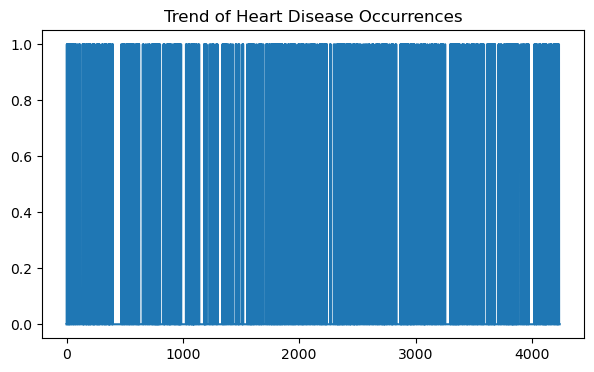

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.title("Heart Disease Case Distribution")
plt.show()

# Line plot representation of target variable
disease_df['TenYearCHD'].plot(figsize=(7,4))
plt.title("Trend of Heart Disease Occurrences")
plt.show()


### 📌 Model Training  
We use Logistic Regression to predict 10-year heart disease risk.


In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


### 📌Model Evaluation  
We compute accuracy, confusion matrix & detailed report.


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy of the model =', accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of the model = 0.8490230905861457

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



### 📌Confusion Matrix Visualization  
This helps visualize true vs predicted classifications.


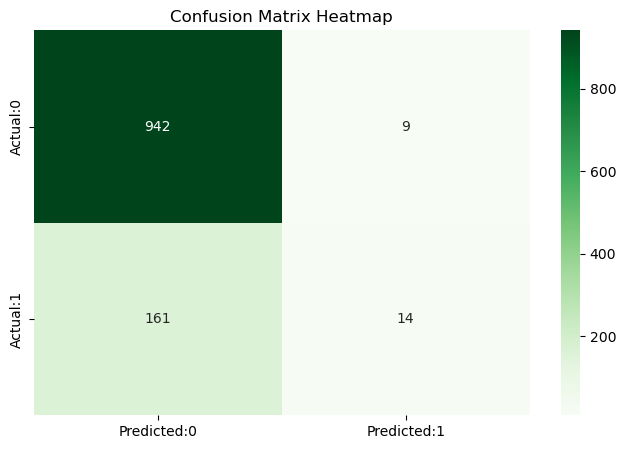

In [10]:
cm = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(
    data=cm,
    columns=['Predicted:0', 'Predicted:1'],
    index=['Actual:0', 'Actual:1']
)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix Heatmap")
plt.show()
